In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#reading in the data
df = pd.read_csv("calendar.csv", parse_dates=['date'], index_col=['date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1393570 entries, 2016-01-04 to 2017-01-02
Data columns (total 3 columns):
listing_id    1393570 non-null int64
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(2)
memory usage: 42.5+ MB


## To get the busiest month for airbnb in seattle, this analysis assumes that listings are unavailable ('available'=='f') when they are occupied by customers. And are available ('available'=='t')  when they are still in the market open for renters.
Hypothesis: the month with higher number of unavailability is the busiest month. This means that higher number of listings have been rented out in that month.


In [5]:
df.head()

,listing_id,available,price
date,,,
2016-01-04,241032,t,$85.00
2016-01-05,241032,t,$85.00
2016-01-06,241032,f,NaN
2016-01-07,241032,f,NaN
2016-01-08,241032,f,NaN


In [6]:
df.sort_values(by=['date'], inplace=True)

In [8]:
df = df.astype({'listing_id':str})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1393570 entries, 2016-01-04 to 2017-01-02
Data columns (total 3 columns):
listing_id    1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: object(3)
memory usage: 42.5+ MB


In [10]:
#resampling data to monthly data
df_month = df.resample('M')

In [11]:
df_month

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]

In [14]:
# to get the count of available and unavalable listings per month
df_unique = df_month.available.value_counts()

In [15]:
df_unique

date        available
2016-01-31  t            59239
            f            47665
2016-02-29  t            73321
            f            37401
2016-03-31  t            83938
            f            34420
2016-04-30  t            76037
            f            38503
2016-05-31  t            79971
            f            38387
2016-06-30  t            77244
            f            37296
2016-07-31  t            74222
            f            44136
2016-08-31  t            76347
            f            42011
2016-09-30  t            77246
            f            37294
2016-10-31  t            82438
            f            35920
2016-11-30  t            81780
            f            32760
2016-12-31  t            87061
            f            31297
2017-01-31  t             5698
            f             1938
Name: available, dtype: int64

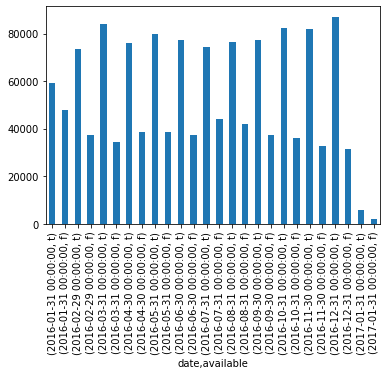

In [21]:
# to show the number of listings that are available in a month, and also the number of unavailable listings in a month
df_unique.plot(kind='bar')

## my problem: i want to display my plot like this: 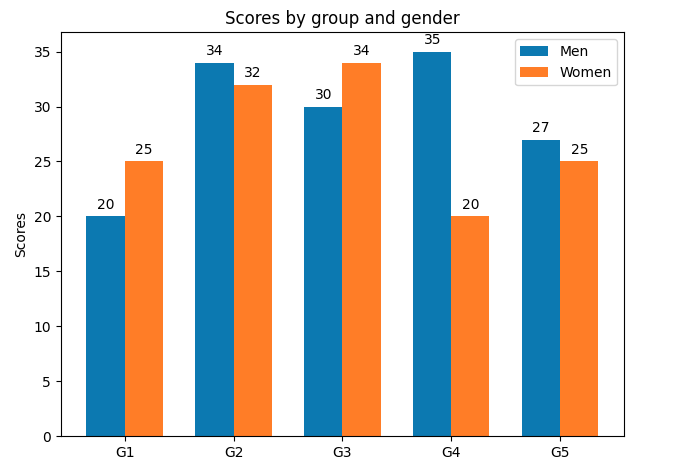
## The x-axis should contain months, and for each month there should be 2bars, each for the availabilty group t/f. And the y-axis should contain the count of t/f.
## Please how can i do this?